In [22]:
%matplotlib inline
import yt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.cm as cm
import scipy
import scipy.integrate as integrate
import scipy.interpolate as interpolate

In [47]:
plt.subplot?

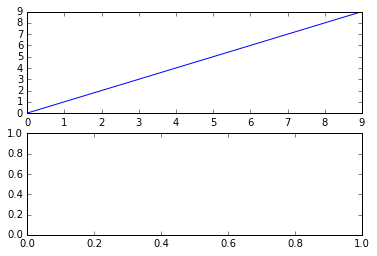

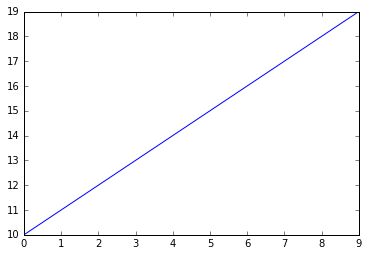

In [48]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(211)
ax3 = f1.add_subplot(212)
ax1.plot(range(0,10))
ax2 = f2.add_subplot(111)
ax2.plot(range(10,20))
f1.savefig('f1.png')
f2.savefig('f2.png')

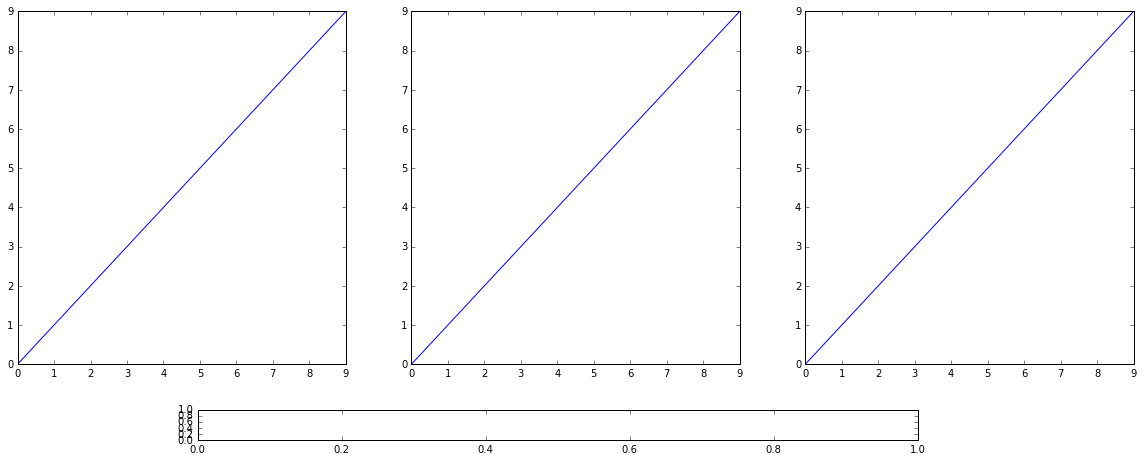

In [68]:
fig,axes= plt.subplots(1,3) #sharey=True,sharex=True)
ax=axes.flatten()
fig.subplots_adjust(bottom=0.2,wspace=0.2) #,hspace=-0.335) #,hspace=0.05)
fig.set_size_inches(20, 7)
for i in range(3): ax[i].plot(range(10))
cax = fig.add_axes([0.25,0.05, 0.5, 0.06])
# cbar= fig.colorbar(img, cax=cax,orientation='horizontal')

In [2]:
def _KaysVx(field, data):
    return data["X-momentum"] / data["density"]
def _KaysVy(field, data):
    return data["Y-momentum"] / data["density"]
def _KaysVz(field, data):
    return data["Z-momentum"] / data["density"]
def _KaysVmag(field, data):
    return (data["KaysVx"]**2 + data["KaysVy"]**2 +data["KaysVz"]**2)**0.5
def _KaysBx(field, data):
    rt4pi= 3.5449
    return data["X-magnfield"]*rt4pi
def _KaysBy(field, data):
    rt4pi= 3.5449
    return data["Y-magnfield"]*rt4pi
def _KaysBz(field, data):
    rt4pi= 3.5449
    return data["Z-magnfield"]*rt4pi

ds1 = yt.load('accretion_data/data.0019.3d.hdf5')
ds1.add_field("KaysVx", function=_KaysVx, units="cm/s")
ds1.add_field("KaysVy", function=_KaysVy, units="cm/s")
ds1.add_field("KaysVz", function=_KaysVz, units="cm/s")
ds1.add_field("KaysVmag", function=_KaysVmag, units="cm/s")
ds1.add_field("KaysBx", function=_KaysBx, units="gauss")
ds1.add_field("KaysBy", function=_KaysBy, units="gauss")
ds1.add_field("KaysBz", function=_KaysBz, units="gauss")

yt : [WARNING  ] 2015-12-14 08:42:44,976 Setting code length to be 1.0 cm
yt : [WARNING  ] 2015-12-14 08:42:44,976 Setting code mass to be 1.0 g
yt : [WARNING  ] 2015-12-14 08:42:44,977 Setting code time to be 1.0 s
yt : [INFO     ] 2015-12-14 08:42:44,994 Parameters: current_time              = 0.503986094188
yt : [INFO     ] 2015-12-14 08:42:44,995 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2015-12-14 08:42:44,996 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2015-12-14 08:42:44,997 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-12-14 08:42:45,112 Loading field plugins.
yt : [INFO     ] 2015-12-14 08:42:45,113 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-14 08:42:45,113 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-14 08:42:45,114 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-14 08:42:45,115 Loaded fluid (63 new fields)
yt : [INFO     ] 2015-12-14 08:42:45,116 Loaded 

yt : [INFO     ] 2015-11-23 13:43:58,556 Projection completed
yt : [INFO     ] 2015-11-23 13:43:58,557 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:43:58,557 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:43:58,560 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:43:58,560 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:43:58,567 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2015-11-23 13:43:59,037 Saving plot proj.png


[64 64 64]



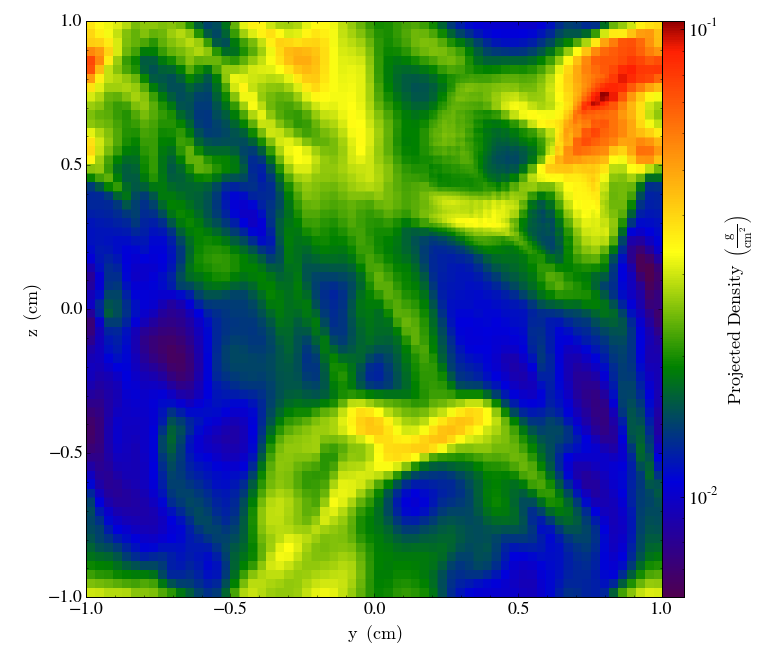

In [119]:
center=(0.,0.,0.)
basecells=64
sinklev=1.
msink=26.#13./32
cs=1.
mach=5.
wid_Ndxmin= [-1,60.]
if wid_Ndxmin[0] == -1: wid_Ndxmin= [basecells*2**sinklev,basecells*2**sinklev]
axis_unit= 'rBH'
cut_dir='x'
field='density'
vectors='vel'
factor=8
cbar=[1e-2,1e-1]

print ds1.domain_dimensions
dxmin= np.array(ds1.domain_width).max()/ds1.domain_dimensions.max()/2**sinklev
width= (wid_Ndxmin[0]*dxmin,wid_Ndxmin[1]*dxmin)
if width[0] >= np.array(ds1.domain_width).max() or width[1] >= np.array(ds1.domain_width).max():
    print 'WARNING: plot may wrap domain around to other side, requested width ~ domain width'
if axis_unit == 'rBH':
    scale= msink/cs**2/(1+mach**2)
else:
    scale= msink/cs**2
ds1.unit_registry.add(axis_unit,scale,yt.units.dimensions.length)
#x
# dir='x'
#     px= yt.SlicePlot(ds1,dir,args.field, center=args.center,\
#                 width=((width[0],'cm'),(width[1],'cm')),axes_unit=args.scale)
# else:
px= yt.ProjectionPlot(ds1,cut_dir,field, center=center,\
            width=((width[0],'cm'),(width[1],'cm')), max_level=sinklev,axes_unit='cm') #axis_unit)
px.annotate_marker((10,10), coord_system='plot',marker='o',
                  plot_args={'color':'black','s':100})

ax = px.plots['density'].axes
# ax.set_xticks(ax.xaxis.get_ticklocs(),['hello']*7)
ax.set_xticklabels(['hello']*7)
# tick_locs = np.arange(-15,15+5,5)
# tick_lbls = tick_locs*scale/dxmin
# ax.set_xticks(tick_locs, tick_lbls)
# for label in ax.xaxis.get_ticklabels():
#     label.set_color('red')
#     label.set_fontsize(16)


# px.annotate_grids(min_level=0,max_level=sinklev)
# if vectors == 'vel': px.annotate_streamlines('KaysVy','KaysVz',factor=factor)
# else: px.annotate_streamlines('KaysBy','KaysBz',factor=factor)
# if cbar != None:
# px.set_zlim('density',cbar[0],cbar[1])
#     print 'setting color bar limits to: (%g,%g)' % (args.cbar[0],args.cbar[1])
# if args.plotSlice: px.save(args.name+'_Slice_%s_%s.png' % (dir,ds1.basename[5:9]))
px.save('proj.png') #% (dir,ds1.basename[5:9]))
px.show()

yt : [INFO     ] 2015-11-23 13:41:47,629 Projection completed
yt : [INFO     ] 2015-11-23 13:41:47,629 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:41:47,630 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:41:47,632 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:41:47,633 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 13:41:47,641 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



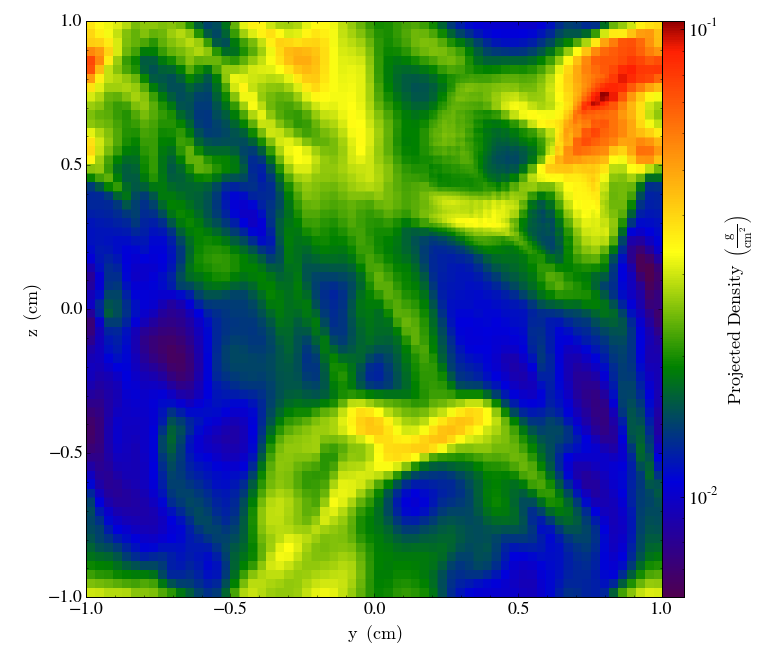

In [112]:
px= yt.ProjectionPlot(ds1,'x','density')
px.show()

yt : [INFO     ] 2015-11-23 14:21:53,381 Projection completed
yt : [INFO     ] 2015-11-23 14:21:53,382 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:53,382 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:53,385 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:53,385 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:53,397 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2015-11-23 14:21:54,222 Projection completed
yt : [INFO     ] 2015-11-23 14:21:54,223 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:54,224 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:54,227 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:54,228 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:21:54,235 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



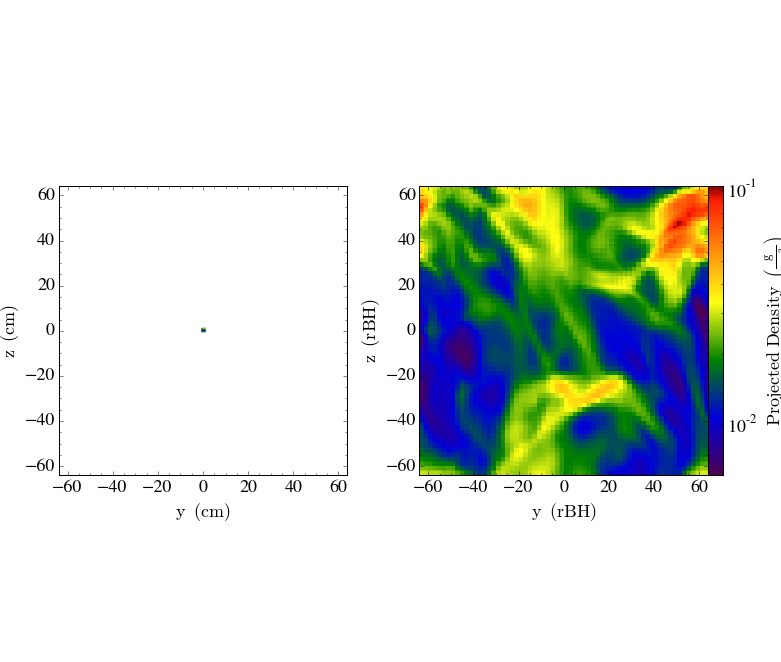

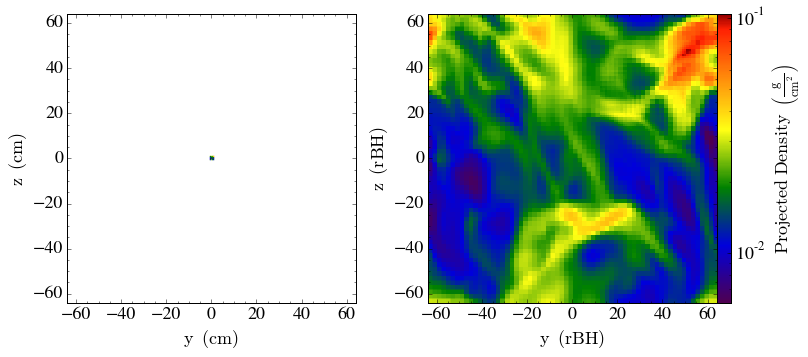

In [142]:
fn = "accretion_data/data.0019.3d.hdf5"
ds = yt.load(fn) # load data

fig = plt.figure()
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (1, 2),
                axes_pad = 1.0,
                label_mode = "all",
                share_all = True,
                cbar_location="right",
                cbar_mode="edge",
                cbar_size="5%",
                cbar_pad="0%")

#special unit calculation
rBH= 0.2 #msink/cs**2/(1+mach**2)
ds1.unit_registry.add('rBH',rBH,yt.units.dimensions.length)

# px= yt.ProjectionPlot(ds1,cut_dir,field, center=center,\
#             width=((width[0],'cm'),(width[1],'cm')), max_level=sinklev,axes_unit='cm') #axis_unit)
###


widths = [float(ds1.domain_width[0]), float(ds1.domain_width[0])] #10.]
units= ['cm', 'rBH']

for i,width,unit in zip(range(len(widths)),widths,units):
    # Load the data and create a single plot
    p = yt.ProjectionPlot(ds, 'x', 'density',width=(width,'cm'),axes_unit=unit)
#     p.set_width(width, unit)

    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots['density']
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

    # Since there are only two colorbar axes, we need to make sure we don't try
    # to set the temperature colorbar to cbar_axes[4], which would if we used i
    # to index cbar_axes, yielding a plot without a temperature colorbar.
    # This unecessarily redraws the Density colorbar three times, but that has
    # no effect on the final plot.

    # Finally, redraw the plot.
    p._setup_plots()

p.show()

yt : [INFO     ] 2015-11-23 14:25:21,437 Projection completed
yt : [INFO     ] 2015-11-23 14:25:21,437 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:25:21,438 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:25:21,441 xlim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:25:21,442 ylim = -1.000000 1.000000
yt : [INFO     ] 2015-11-23 14:25:21,449 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



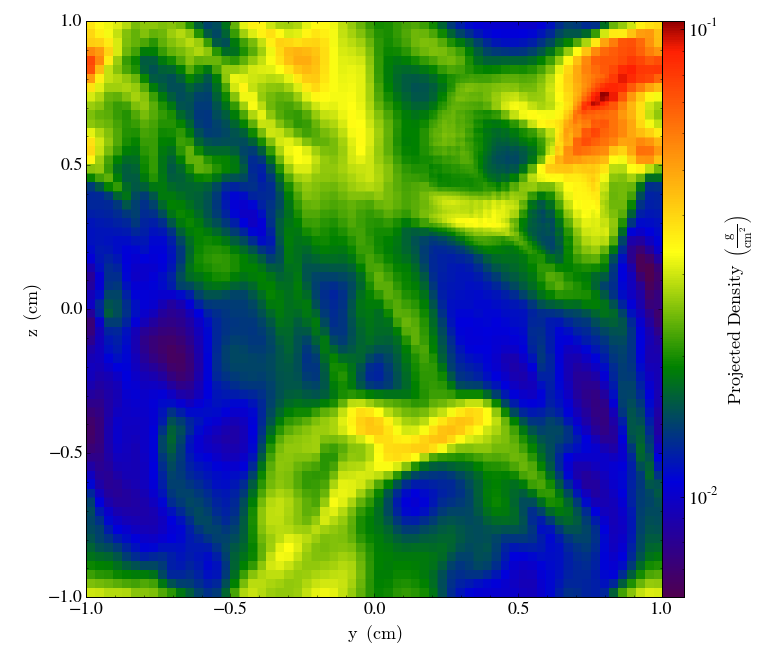

In [143]:
fn = "accretion_data/data.0019.3d.hdf5"
ds = yt.load(fn) # load data
p = yt.ProjectionPlot(ds, 'x', 'density',width=(float(ds.domain_width[0]),'cm'),axes_unit='cm')
p.show()


In [259]:
frb['KaysVx']

yt : [INFO     ] 2015-11-23 17:11:24,370 Making a fixed resolution buffer of (KaysVx) 1000 by 1000
yt : [INFO     ] 2015-11-23 17:11:24,636 Projection completed


ImageArray([[-0.45457299, -0.45457299, -0.45457299, ...,  5.66664083,
         5.66664083,  5.66664083],
       [-0.45457299, -0.45457299, -0.45457299, ...,  5.66664083,
         5.66664083,  5.66664083],
       [-0.45457299, -0.45457299, -0.45457299, ...,  5.66664083,
         5.66664083,  5.66664083],
       ..., 
       [-0.11989187, -0.11989187, -0.11989187, ..., -1.22827101,
        -1.22827101, -1.22827101],
       [-0.11989187, -0.11989187, -0.11989187, ..., -1.22827101,
        -1.22827101, -1.22827101],
       [-0.11989187, -0.11989187, -0.11989187, ..., -1.22827101,
        -1.22827101, -1.22827101]]) cm**2/s

# magnetic field line code

In [23]:
def my_streamlines(xmax,xmin,dx,xf,yf,bx2d,by2d):
    def bfunc(x,t):
        i = int(np.floor((x[0]-xmin)/(xmax-xmin) * bx2d.shape[0]))
        i = min(max(i,0),bx2d.shape[0]-1)
        j = int(np.floor((x[1]-xmin)/(xmax-xmin) * bx2d.shape[1]))
        j = min(max(j,0),bx2d.shape[1]-1)

        return np.array([bx2d[i,j],by2d[i,j]])

    def jac(x,t):
        i = int(np.floor((x[0]-xmin)/(xmax-xmin) * bx2d.shape[0]))
        i = min(max(i,1),bx2d.shape[0]-2)
        j = int(np.floor((x[1]-xmin)/(xmax-xmin) * bx2d.shape[1]))
        j = min(max(j,1),bx2d.shape[1]-2)
        dbx_dxL = (bx2d[i  ,j  ]-bx2d[i-1,j  ])/dx[1]
        dbx_dyL = (bx2d[i  ,j  ]-bx2d[i  ,j-1])/dx[2]
        dby_dxL = (by2d[i  ,j  ]-bx2d[i-1,j  ])/dx[1]
        dby_dyL = (by2d[i  ,j  ]-bx2d[i  ,j-1])/dx[2]
        dbx_dxR = (bx2d[i+1,j  ]-bx2d[i  ,j  ])/dx[1]
        dbx_dyR = (bx2d[i  ,j+1]-bx2d[i  ,j  ])/dx[2]
        dby_dxR = (by2d[i+1,j  ]-bx2d[i  ,j  ])/dx[1]
        dby_dyR = (by2d[i  ,j+1]-bx2d[i  ,j  ])/dx[2]

        dbx_dx = 0.5*(dbx_dxL+dbx_dxR)
        dbx_dy = 0.5*(dbx_dyL+dbx_dyR)
        dby_dx = 0.5*(dby_dxL+dby_dxR)
        dby_dy = 0.5*(dby_dyL+dby_dyR)

        return np.array([[dbx_dx,dbx_dy],[dby_dx,dby_dy]])

    def mbfunc(x,t): return -bfunc(x,t)

    def mjac(x,t): return -jac(x,t)

    # integrate some field lines
    nstep=3*np.max(bx2d.shape)
    tend=np.max(xmax-xmin)
    parametric_t=np.linspace(0,tend,nstep)
    points = []
    for line in range(0,len(xf)):
        print "starting footpoint= ",xf[line],yf[line]
        points.append(integrate.odeint( bfunc,np.array([xf[line],yf[line]]),parametric_t,Dfun= jac,mxstep=600000,rtol=0.,atol=0.01*np.min(dx)))
        points.append(integrate.odeint(mbfunc,np.array([xf[line],yf[line]]),parametric_t,Dfun=mjac,mxstep=600000,rtol=0.,atol=0.01*np.min(dx)))
    return points

yt : [INFO     ] 2015-12-14 11:58:17,545 Projection completed
yt : [INFO     ] 2015-12-14 11:58:17,549 Making a fixed resolution buffer of (density) 64 by 64
yt : [INFO     ] 2015-12-14 11:58:17,551 Making a fixed resolution buffer of (KaysBx) 64 by 64
yt : [INFO     ] 2015-12-14 11:58:17,841 Projection completed
yt : [INFO     ] 2015-12-14 11:58:17,844 Making a fixed resolution buffer of (KaysBy) 64 by 64
yt : [INFO     ] 2015-12-14 11:58:18,110 Projection completed


shape=  (64, 64)
starting footpoint=  1.575 28.35
starting footpoint=  4.725 28.35
starting footpoint=  7.875 28.35
starting footpoint=  11.025 28.35
starting footpoint=  14.175 28.35
starting footpoint=  17.325 28.35
starting footpoint=  20.475 28.35
starting footpoint=  23.625 28.35
starting footpoint=  26.775 28.35
starting footpoint=  29.925 28.35
starting footpoint=  33.075 28.35
starting footpoint=  36.225 28.35
starting footpoint=  39.375 28.35
starting footpoint=  42.525 28.35
starting footpoint=  45.675 28.35
starting footpoint=  48.825 28.35
starting footpoint=  51.975 28.35
starting footpoint=  55.125 28.35
starting footpoint=  58.275 28.35
starting footpoint=  61.425 28.35


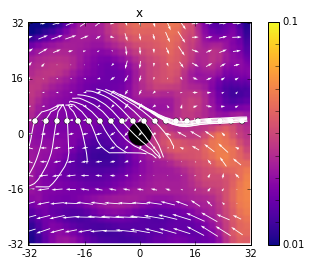

In [35]:
fn = "accretion_data/data.0019.3d.hdf5"
ds = yt.load(fn) # load data

width_rBH= 64
cmin,cmax= 1e-2,1e-1
msink=13./32
cs=1.
mach=5.
rBH= msink/cs**2/(mach**2+1)

cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'inferno', 'plasma', 'magma'])]

if width_rBH == -1: width = (float(ds.domain_width[0]), 'cm') # we want a 1.5 mpc view
else: width= (width_rBH*rBH,'cm')
Npx= 64
res = [Npx, Npx] # create an image with 1000x1000 pixels

fig,ax= plt.subplots() #sharey=True,sharex=True)
proj = ds.proj('density','z')
frb = proj.to_frb(width, res, center=ds.domain_center)
img= np.array(frb['density'])[::-1]
Bx= np.array(frb['KaysBx'])[::-1]
By= np.array(frb['KaysBy'])[::-1]
print 'shape= ',img.shape
cax= ax.imshow(np.log10(img),cmap=cm.plasma,vmin=np.log10(cmin),vmax=np.log10(cmax))
ax.autoscale(False)
#sink marker
ax.scatter(Npx/2,Npx/2,s=500,c='black',marker='o')
#vector plot
X, Y = np.meshgrid(np.arange(0,Npx), np.arange(0,Npx))
skip=4
Q = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], Bx[::skip, ::skip], By[::skip, ::skip],
               pivot='mid', color='white', units='inches')

## integrate streamlines
xmin= 0.
xmax= float(Npx-1) 
dx=[1.,1.,1.]
# footpoints
nf=20
# z=0 plane
xfline = (np.arange(nf,dtype=np.float)/nf+0.5/nf)*(xmax-xmin)+xmin
yfline = np.zeros_like(xfline)+(xmax-xmin)*0.45
# circle
# nf=5
# r = 0.125*min(xmax-xmin,xmax-xmin)
# center = [0.5*(xmax+xmin),0.5*(xmax+xmin)]
# xfcircle = r*np.cos(2*np.pi*(np.linspace(0,1,nf,endpoint=False)+0.5/nf))+center[0]
# yfcircle = r*np.sin(2*np.pi*(np.linspace(0,1,nf,endpoint=False)+0.5/nf))+center[1]
#
xf = xfline #np.concatenate((xfline,xfcircle))
yf = yfline #np.concatenate((yfline,yfcircle))
ax.plot(xf,yf,marker='o',color='white',linestyle='None')
## get streamlines
points=my_streamlines(xmax,xmin,dx,xf,yf,Bx,By)
for i in range(0,len(points)):
    xdata = (points[i])[:,0]
    ydata = (points[i])[:,1]
    args = np.where(xdata>xmin)
    xdata=xdata[args]; ydata=ydata[args]
    args = np.where(xdata<xmax)
    xdata=xdata[args]; ydata=ydata[args]
    args = np.where(ydata>xmin)
    xdata=xdata[args]; ydata=ydata[args]
    args = np.where(ydata<xmax)
    xdata=xdata[args]; ydata=ydata[args]
    ax.plot(xdata,ydata,color='white',lw=1)
##

# Q = ax.streamplot(X,Y,Vy,Vz,arrowstyle='-',color='white', linewidth=2,density=1.)
#user defined ticks
xticks=(Npx*np.array([0.,0.25,0.5,0.75,1.])).astype('int')
# xticks_labs= (xticks-500)*rBH/Npx
ax.set_xticks(xticks)
ax.set_xticklabels(((xticks-Npx/2.)*float(width_rBH)/Npx).astype('int'))  #ax.xaxis.get_ticklocs()/100.)
ax.set_yticks(xticks)
ax.set_yticklabels(((xticks[::-1]-Npx/2.)*float(width_rBH)/Npx).astype('int')) #ax.yaxis.get_ticklocs()/100.)
ax.set_title('x')
#color bar
# cbar.ax.set_yticks([-2,-1.5,-1])
# cbar.ax.set_yticklabels(['a','','','b','','','c'])  # vertically oriented colorbar
# cbar.ax.set_yticklabels(10**cbar.ax.get_yticklabels())

# fig.subplots_adjust(right=0.85)
# cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# cbar= fig.colorbar(im, cax=cax)    

cbar = fig.colorbar(cax) # ticks=[-1,0,1])
cbar_labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
cbar_labels = ['']*len(cbar_labels)
cbar_labels[0]= cmin
cbar_labels[-1]= cmax
cbar.ax.set_yticklabels(cbar_labels)


In [3]:
np.around(1.4),np.around(1.5)

(1.0, 2.0)

In [8]:
from scipy.integrate import ode

# fn = "accretion_data/data.0019.3d.hdf5"
# ds = yt.load(fn) # load data

# width = (float(ds.domain_width[0]), 'cm') # we want a 1.5 mpc view
# Npx= 1000
# res = [Npx, Npx] # create an image with 1000x1000 pixels
# fig,ax= plt.subplots() #sharey=True,sharex=True)
# proj = ds.proj('density','x')
# frb = proj.to_frb(width, res, center=ds.domain_center)
# img= np.array(frb['density'])[::-1]
# By= np.array(frb['KaysBy'])[::-1]
# Bz= np.array(frb['KaysBz'])[::-1]
# cax= ax.imshow(np.log10(img),vmin=np.log10(cmin),vmax=np.log10(cmax))
# ax.autoscale(False)
##integrate streamlines
# def E_point_charge(q, a, x, y):
#     return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
#         q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
# def B_total(x, y):
#     return Bx[x,y], By[x,y]
 

 

ds = yt.load('accretion_data/data.0019.3d.hdf5')
ds.add_field("KaysVx", function=_KaysVx, units="cm/s")
ds.add_field("KaysVy", function=_KaysVy, units="cm/s")
ds.add_field("KaysVz", function=_KaysVz, units="cm/s")
ds.add_field("KaysBx", function=_KaysBx, units="gauss")
ds.add_field("KaysBy", function=_KaysBy, units="gauss")
ds.add_field("KaysBz", function=_KaysBz, units="gauss")

width = (float(ds.domain_width[0]), 'cm') # we want a 1.5 mpc view
Npx= 64
res = [Npx, Npx] # create an image with 1000x1000 pixels
cut_dir='x'
proj = ds.proj('density',cut_dir)
frb = proj.to_frb(width, res, center=ds.domain_center)
img= np.array(frb['density'])[::-1]
if cut_dir == 'x': 
    Vhoriz,Vvert= np.array(frb['KaysVy'])[::-1], np.array(frb['KaysVz'])[::-1]
    Bhoriz,Bvert= np.array(frb['KaysBy'])[::-1], np.array(frb['KaysBz'])[::-1]

def E_dir(t, y, Bx,By):
#     xlow,xhi= int(y[0]),int(y[0])+1
#     ylow,yhi= int(y[1]),int(y[1])+1
    #x
#     A1= 1-(y[0]-xlow)
#     A2= y[0]-xlow
#     newBx= A1*Bx[xlow,ylow]+A2*Bx[xhi,yhi]
    #y
#     A1= 1-(y[1]-xlow)
#     A2= y[1]-xlow
#     newBy= A1*By[xlow,ylow]+A2*By[xhi,yhi]
#     print "in E_dir: t= ",t,"y= ",y
    xrnd,yrnd= int(np.around(y[0])),int(np.around(y[1]))
    print "t= ",t,"xrnd= ",xrnd,"yrnd= ",yrnd
    newBx,newBy= Bx[xrnd,yrnd],By[xrnd,yrnd]
    n=np.sqrt(newBx**2+newBy**2)
    return [newBx/n, newBy/n]
    
# plot field lines
x0, x1=1, Npx-1
y0, y1=1,Npx-1
# R=10.
# loop over all charges
# plot field lines starting in current charge
dt=10 #n pixels
# loop over field lines starting in different directions 
# for xloc,yloc in zip(np.linspace(Npx/10, Npx-Npx/10,num=10),np.array([0.5*Npx]*10)):
xloc,yloc=5,56
r=ode(E_dir)
r.set_integrator('vode')
r.set_f_params(Bhoriz,Bvert)
x,y=[ xloc ],[ yloc ]
r.set_initial_value([x[0], y[0]], 0)
#integrate forward
while r.successful():
    r.integrate(r.t+dt)
    print 'r.t= ',r.t,'dt= ',dt
    x.append(r.y[0])
    y.append(r.y[1])
#             hit_charge=False
    # check if field line left drawing area or within critical distance of sink
#             for C2 in charges:
#                 if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
#                     hit_charge=True
    if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
        break
plt.plot(x, y, '-k')
#integrate backward
x,y=[ xloc ],[ yloc ]
r.set_initial_value([x[0], y[0]], 0)
while r.successful():
    r.integrate(r.t-dt)
    x.append(r.y[0])
    y.append(r.y[1])
#             hit_charge=False
    # check if field line left drawing area or within critical distance of sink
#             for C2 in charges:
#                 if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
#                     hit_charge=True
    if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
        break
plt.plot(x, y, '-k')
#         r=ode(E_dir)
#         r.set_integrator('vode')
#         x,y=[ xloc ],[ Npx/2 ]
#         r.set_initial_value([x[0], y[0]], 0)
#         while r.successful():
#             r.integrate(r.t-dt)
#             x.append(r.y[0])
#             y.append(r.y[1])
#             if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
#                 break
#         plt.plot(x, y, '-k')
 
# plot point charges
plt.plot(Npx/2,Npx/2, 'bo')
plt.gca().set_xlim(x0, x1)
plt.gca().set_ylim(y0, y1)

yt : [WARNING  ] 2015-12-14 08:50:18,952 Field KaysVx already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-14 08:50:18,954 Field KaysVy already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-14 08:50:18,955 Field KaysVz already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-14 08:50:18,956 Field KaysBx already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-14 08:50:18,958 Field KaysBy already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-14 08:50:18,959 Field KaysBz already exists. To override use force_override=True.
yt : [INFO     ] 2015-12-14 08:50:19,214 Projection completed
yt : [INFO     ] 2015-12-14 08:50:19,216 Making a fixed resolution buffer of (density) 64 by 64
yt : [INFO     ] 2015-12-14 08:50:19,219 Making a fixed resolution buffer of (KaysVy) 64 by 64
yt : [INFO     ] 2015-12-14 08:50:19,579 Projection completed
yt : [INFO     ] 2015-12-14 08:50:19,581 Ma

t=  0.0 xrnd=  5 yrnd=  56
t=  3.7557789122e-07 xrnd=  5 yrnd=  56
t=  0.000488461024472 xrnd=  5 yrnd=  56
t=  0.000244230512236 xrnd=  5 yrnd=  56
t=  2.44254935287 xrnd=  7 yrnd=  58
t=  2.44254935287 xrnd=  6 yrnd=  58
t=  2.44254935287 xrnd=  7 yrnd=  58
t=  0.610820511103 xrnd=  5 yrnd=  56
t=  1.22139679169 xrnd=  6 yrnd=  57
t=  1.22139679169 xrnd=  6 yrnd=  57
t=  0.671878139162 xrnd=  6 yrnd=  56
t=  0.671878139162 xrnd=  6 yrnd=  56
t=  0.616926273908 xrnd=  5 yrnd=  56
t=  0.623032036714 xrnd=  5 yrnd=  56
t=  0.684089664773 xrnd=  6 yrnd=  56
t=  0.684089664773 xrnd=  6 yrnd=  56
t=  0.62913779952 xrnd=  5 yrnd=  56
t=  0.635243562326 xrnd=  5 yrnd=  56
t=  0.696301190385 xrnd=  6 yrnd=  56
t=  0.696301190385 xrnd=  6 yrnd=  56
t=  0.641349325132 xrnd=  6 yrnd=  56
t=  0.641349325132 xrnd=  6 yrnd=  56
t=  0.635854138607 xrnd=  6 yrnd=  56
t=  0.635854138607 xrnd=  6 yrnd=  56
t=  0.635243562326 xrnd=  6 yrnd=  56
t=  0.635304619954 xrnd=  6 yrnd=  56
t=  0.635365677582 xr

IndexError: index 65 is out of bounds for axis 1 with size 64

In [10]:
bx2d=np.zeros((64,64))
x=1.6
xmin=1.
xmax=2.
i=int(np.floor((x-xmin)/(xmax-xmin) * bx2d.shape[0]))
i = min(max(i,0),bx2d.shape[0]-1)
i

38

In [14]:
nf=20
xmin=1.
xmax=2.
# z=0 plane
xfline = (np.arange(nf,dtype=np.float)/nf+0.5/nf)*(xmax-xmin)+xmin
xfline

array([ 1.025,  1.075,  1.125,  1.175,  1.225,  1.275,  1.325,  1.375,
        1.425,  1.475,  1.525,  1.575,  1.625,  1.675,  1.725,  1.775,
        1.825,  1.875,  1.925,  1.975])

In [17]:
# import scipy.integrate as integrate
# integrate.odeint?
nf=20
xmax=999.
xmin=0.
(np.arange(nf,dtype=np.float)/nf+0.5/nf)*(xmax-xmin)+xmin

array([  24.975,   74.925,  124.875,  174.825,  224.775,  274.725,
        324.675,  374.625,  424.575,  474.525,  524.475,  574.425,
        624.375,  674.325,  724.275,  774.225,  824.175,  874.125,
        924.075,  974.025])

(-1.5, 1.5)

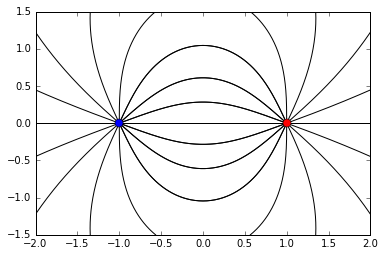

In [58]:
class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey=0, 0
    for C in charges:
        E=E_point_charge(C.q, C.pos, x, y)
        Ex=Ex+E[0]
        Ey=Ey+E[1]
    return [ Ex, Ey ]
 
def E_dir(t, y, charges):
    Ex, Ey=E_total(y[0], y[1], charges)
    n=np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]
 

# charges and positions
charges=[ charge(1, [-1, 0]), charge(-1, [1, 0]) ]
 
# plot field lines
x0, x1=-2, 2
y0, y1=-1.5, 1.5
R=0.01
# loop over all charges
for C in charges:
    # plot field lines starting in current charge
    dt=0.8*R
    if C.q<0:
        dt=-dt
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in np.linspace(0, 2*np.pi*15/16, 16):
        r=ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x=[ C.pos[0] + np.cos(alpha)*R ]
        y=[ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge=True
            if hit_charge or (not (x0<r.y[0] and r.y[0]<x1)) or \
                    (not (y0<r.y[1] and r.y[1]<y1)):
                break
        plt.plot(x, y, '-k')
 
# plot point charges
for C in charges:
    if C.q>0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(C.q))
    if C.q<0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(-C.q))
plt.gca().set_xlim(x0, x1)
plt.gca().set_ylim(y0, y1)

In [117]:
from mayavi import mlab

ImportError: No module named mayavi

yt : [WARNING  ] 2015-12-10 22:45:19,625 Field KaysVx already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,627 Field KaysVy already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,628 Field KaysVz already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,629 Field KaysVmag already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,633 Field KaysBx already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,634 Field KaysBy already exists. To override use force_override=True.
yt : [WARNING  ] 2015-12-10 22:45:19,635 Field KaysBz already exists. To override use force_override=True.
yt : [INFO     ] 2015-12-10 22:45:20,104 Projection completed
yt : [INFO     ] 2015-12-10 22:45:20,108 Making a fixed resolution buffer of (density) 1000 by 1000
yt : [INFO     ] 2015-12-10 22:45:20,129 Making a fixed resolution buffer of (KaysVy) 1

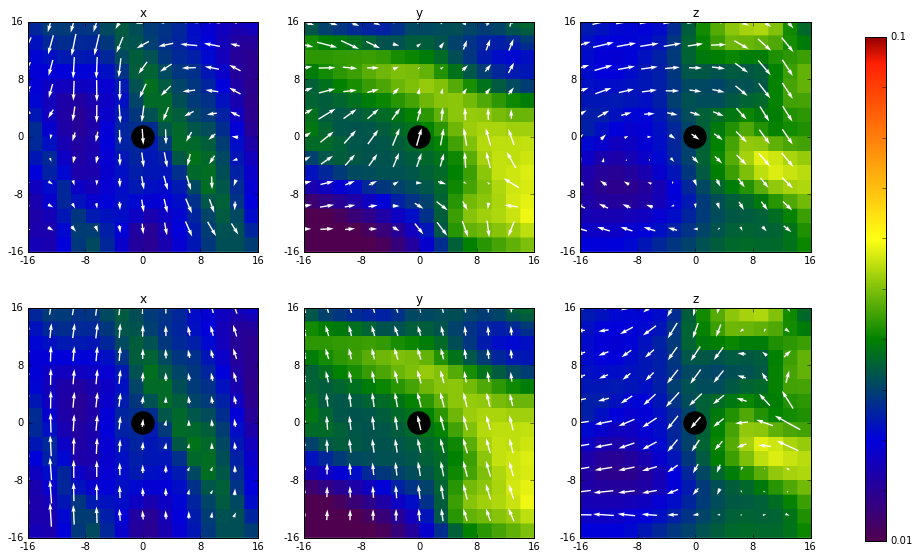

In [5]:
def _KaysVx(field, data):
    return data["X-momentum"] / data["density"]
def _KaysVy(field, data):
    return data["Y-momentum"] / data["density"]
def _KaysVz(field, data):
    return data["Z-momentum"] / data["density"]
def _KaysVmag(field, data):
    return (data["KaysVx"]**2 + data["KaysVy"]**2 +data["KaysVz"]**2)**0.5
def _KaysBx(field, data):
    rt4pi= 3.5449
    return data["X-magnfield"]*rt4pi
def _KaysBy(field, data):
    rt4pi= 3.5449
    return data["Y-magnfield"]*rt4pi
def _KaysBz(field, data):
    rt4pi= 3.5449
    return data["Z-magnfield"]*rt4pi

ds = yt.load('accretion_data/data.0019.3d.hdf5')
ds.add_field("KaysVx", function=_KaysVx, units="cm/s")
ds.add_field("KaysVy", function=_KaysVy, units="cm/s")
ds.add_field("KaysVz", function=_KaysVz, units="cm/s")
ds.add_field("KaysVmag", function=_KaysVmag, units="cm/s")
ds.add_field("KaysBx", function=_KaysBx, units="gauss")
ds.add_field("KaysBy", function=_KaysBy, units="gauss")
ds.add_field("KaysBz", function=_KaysBz, units="gauss")

width_rBH= 32
cmin,cmax= 1e-2,1e-1
msink=13./32
cs=1.
mach=5.
rBH= msink/cs**2/(mach**2+1)

if width_rBH == -1: width = (float(ds.domain_width[0]), 'cm') # we want a 1.5 mpc view
else: width= (width_rBH*rBH,'cm')
Npx= 1000
res = [Npx, Npx] # create an image with 1000x1000 pixels

fig,axes= plt.subplots(2,3) #sharey=True,sharex=True)
fig.set_size_inches(15, 10)
ax=axes.flatten()
for i,cut_dir in zip(range(6),['x','y','z']*2):
    proj = ds.proj('density',cut_dir)
    frb = proj.to_frb(width, res, center=ds.domain_center)
    img= np.array(frb['density'])[::-1]
    if cut_dir == 'x': 
        Vhoriz,Vvert= np.array(frb['KaysVy'])[::-1], np.array(frb['KaysVz'])[::-1]
        Bhoriz,Bvert= np.array(frb['KaysBy'])[::-1], np.array(frb['KaysBz'])[::-1]
    elif cut_dir == 'y': 
        Vhoriz,Vvert= np.array(frb['KaysVx'])[::-1], np.array(frb['KaysVz'])[::-1]
        Bhoriz,Bvert= np.array(frb['KaysBx'])[::-1], np.array(frb['KaysBz'])[::-1]
    else: 
        Vhoriz,Vvert= np.array(frb['KaysVx'])[::-1], np.array(frb['KaysVy'])[::-1]
        Bhoriz,Bvert= np.array(frb['KaysBx'])[::-1], np.array(frb['KaysBy'])[::-1]
#     cax= ax[i].imshow(np.log10(img),vmin=np.log10(cmin),vmax=np.log10(cmax))
    im= ax[i].imshow(np.log10(img),vmin=np.log10(cmin),vmax=np.log10(cmax))
    ax[i].autoscale(False)
    #sink marker
    ax[i].scatter(Npx/2,Npx/2,s=500,c='black',marker='o')
    #quiver plot
    X, Y = np.meshgrid(np.arange(0,Npx), np.arange(0,Npx))
    skip=100
    if i <= 2: 
        Q = ax[i].quiver(X[::skip, ::skip], Y[::skip, ::skip], Vhoriz[::skip, ::skip], Vvert[::skip, ::skip],
               pivot='mid', color='white', units='inches')
    else: 
        Q = ax[i].quiver(X[::skip, ::skip], Y[::skip, ::skip], Bhoriz[::skip, ::skip], Bvert[::skip, ::skip],
               pivot='mid', color='white', units='inches')
    #user defined ticks
    xticks=(Npx*np.array([0.,0.25,0.5,0.75,1.])).astype('int')
    # xticks_labs= (xticks-500)*rBH/Npx
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(((xticks-500)*float(width_rBH)/Npx).astype('int'))  #ax.xaxis.get_ticklocs()/100.)
    ax[i].set_yticks(xticks)
    ax[i].set_yticklabels(((xticks[::-1]-500)*float(width_rBH)/Npx).astype('int')) #ax.yaxis.get_ticklocs()/100.)
    ax[i].set_title(cut_dir)
    #color bar
    # cbar.ax.set_yticks([-2,-1.5,-1])
    # cbar.ax.set_yticklabels(['a','','','b','','','c'])  # vertically oriented colorbar
    # cbar.ax.set_yticklabels(10**cbar.ax.get_yticklabels())

fig.subplots_adjust(right=0.85,hspace=0.05)
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar= fig.colorbar(im, cax=cax)    

# cbar = fig.colorbar(cax) # ticks=[-1,0,1])
cbar_labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
cbar_labels = ['']*len(cbar_labels)
cbar_labels[0]= cmin
cbar_labels[-1]= cmax
cbar.ax.set_yticklabels(cbar_labels)


In [248]:
fig.add_axes?

In [78]:
ax.set_xticks(ax.xaxis.get_ticklocs(),['hello']*7)

In [14]:
plt.imshow?

In [24]:
from matplotlib.ticker import MaxNLocator

yt : [INFO     ] 2015-12-13 15:00:33,131 Projection completed
yt : [INFO     ] 2015-12-13 15:00:33,134 Making a fixed resolution buffer of (density) 1000 by 1000
yt : [INFO     ] 2015-12-13 15:00:33,152 Making a fixed resolution buffer of (KaysVy) 1000 by 1000
yt : [INFO     ] 2015-12-13 15:00:33,403 Projection completed
yt : [INFO     ] 2015-12-13 15:00:33,416 Making a fixed resolution buffer of (KaysVz) 1000 by 1000
yt : [INFO     ] 2015-12-13 15:00:33,675 Projection completed
yt : [INFO     ] 2015-12-13 15:00:33,697 Making a fixed resolution buffer of (KaysBy) 1000 by 1000
yt : [INFO     ] 2015-12-13 15:00:33,863 Projection completed
yt : [INFO     ] 2015-12-13 15:00:33,876 Making a fixed resolution buffer of (KaysBz) 1000 by 1000
yt : [INFO     ] 2015-12-13 15:00:34,055 Projection completed


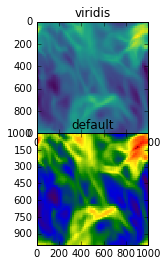

In [29]:
cut_dir='x'
fig,axes= plt.subplots(2,1) #sharey=True,sharex=True)
# fig.set_size_inches(15, 15)
fig.subplots_adjust(hspace=0)
ax=axes.flatten()
proj = ds.proj(field="density",axis=cut_dir)
width = (float(ds.domain_width[0]), 'cm')
frb = proj.to_frb(width=width,resolution=[1000,1000])
rho0=1e-2
img= np.array(frb['density'])[::-1]/rho0
if cut_dir == 'x':
    Vhoriz,Vvert= np.array(frb['KaysVy'])[::-1], np.array(frb['KaysVz'])[::-1]
    Bhoriz,Bvert= np.array(frb['KaysBy'])[::-1], np.array(frb['KaysBz'])[::-1]
    xlab,ylab='y [rBH]','z [rBH]'
for i,cmap,name in zip(range(2),\
                         [cm.viridis,None],\
                        ['viridis','default']):
    im= ax[i].imshow(np.log10(img),cmap=cmap) #,vmin=np.log10(args.clim[0]),vmax=np.log10(args.clim[1]))
    ax[i].autoscale(False)
    ax[i].set_title(name)
    if i == 1: ax[i].yaxis.set_major_locator(MaxNLocator(prune='upper'))
    #color bar
    # cbar.ax.set_yticks([-2,-1.5,-1])
    # cbar.ax.set_yticklabels(['a','','','b','','','c'])  # vertically oriented colorbar
    # cbar.ax.set_yticklabels(10**cbar.ax.get_yticklabels())

# fig.subplots_adjust(right=0.85,hspace=0.05)
# cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# cbar= fig.colorbar(im, cax=cax)

# # cbar = fig.colorbar(cax) # ticks=[-1,0,1])
# cbar_labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
# cbar_labels = ['']*len(cbar_labels)
# cbar_labels[0]= args.clim[0]
# cbar_labels[-1]= args.clim[1]
# cbar.ax.set_yticklabels(cbar_labels)
# cbar.set_label(r'$\mathbf{ \rho/\bar{\rho} }$',fontsize='xx-large')

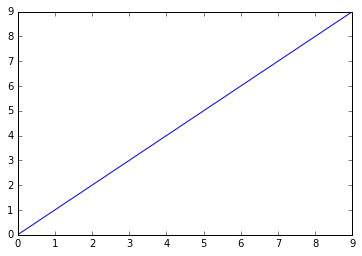

In [28]:
fig,ax=plt.subplots()
ax.plot(range(10))
ax.yaxis.set_major_locator

In [31]:
a=np.zeros((15,2))
a[:,0]=

(15, 2)

In [49]:
a=np.zeros((15,2))
a[:,0]=np.linspace(50,950,num=15)
a[:,1]=np.array([500]*15)


array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500])

In [50]:
plt.streamplot?